In [3]:
#import numpy for linear algebra
import numpy as np 

#import pandas for data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

#import visualization seaborn 
import seaborn as sns

#import visualization matplotlib
import matplotlib.pyplot as plt

#import OS
import os

#import statistics 
from scipy import stats
#import metric module
from sklearn import metrics

#import Label encoder for convert alphabet to numeric
from sklearn.preprocessing import LabelEncoder

#import splitting model from sklearn
from sklearn.model_selection import train_test_split

#import DT model
from sklearn.tree import DecisionTreeClassifier 

#import NB model
from sklearn.naive_bayes import GaussianNB

#import KNN model
from sklearn.neighbors import KNeighborsClassifier

#import SVC
from sklearn.svm import SVC

In [5]:
df.head()

,Disease,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.2,y,57,y,1.28,y,44,n,?


In [6]:
#before the rename the target column
df=df.rename(columns={df.columns[0]:"target"})

In [7]:
df.isna().sum() 

target                       0
Age                          0
Sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [8]:
for column in df.columns:
    listOfValues=set(df[column])
    print(column,": ",listOfValues)

target :  {'hypothyroid', 'negative'}
Age :  {'86', '21', '92', '?', '37', '76', '88', '59', '15', '98', '14', '64', '19', '29', '40', '75', '74', '89', '30', '24', '54', '13', '93', '55', '78', '32', '4', '8', '90', '73', '27', '53', '11', '12', '9', '28', '42', '48', '16', '46', '71', '72', '61', '31', '39', '5', '66', '18', '57', '65', '58', '60', '50', '45', '81', '80', '84', '82', '56', '43', '52', '69', '51', '22', '6', '35', '85', '33', '67', '63', '47', '26', '97', '20', '70', '68', '34', '77', '49', '83', '87', '23', '10', '44', '41', '7', '1', '62', '25', '17', '38', '36', '79'}
Sex :  {'F', 'M', '?'}
on_thyroxine :  {'f', 't'}
query_on_thyroxine :  {'f', 't'}
on_antithyroid_medication :  {'f', 't'}
thyroid_surgery :  {'f', 't'}
query_hypothyroid :  {'f', 't'}
query_hyperthyroid :  {'f', 't'}
pregnant :  {'f', 't'}
sick :  {'f', 't'}
tumor :  {'f', 't'}
lithium :  {'f', 't'}
goitre :  {'f', 't'}
TSH_measured :  {'y', 'n'}
TSH :  {'21', '1.6', '92', '?', '213', '0.85', '0.6', 

In [9]:
df=df.replace({"?":np.NAN})
df.isna().sum()

target                          0
Age                           446
Sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [10]:
del df["TBG"]

In [11]:
df.dropna(axis = 0, thresh = 21, inplace = True)
df.isna().sum()

target                         0
Age                          418
Sex                           68
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          222
T3_measured                    0
T3                           449
TT4_measured                   0
TT4                            3
T4U_measured                   0
T4U                            2
FTI_measured                   0
FTI                            1
TBG_measured                   0
dtype: int64

In [12]:
df = df.replace({"t":1,"f":0, "y":1, "n":0, "hypothyroid":1, "negative":0, "F":1, "M":0})
display(df.dtypes)

target                         int64
Age                           object
Sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                           object
T3_measured                    int64
T3                            object
TT4_measured                   int64
TT4                           object
T4U_measured                   int64
T4U                           object
FTI_measured                   int64
FTI                           object
TBG_measured                   int64
dtype: object

In [13]:
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

df = df.interpolate(method = 'spline', order = 4)
df.isna().sum()

target                       0
Age                          0
Sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

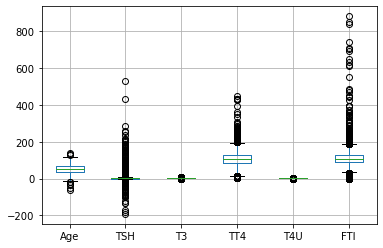

In [14]:
df[['Age','TSH','T3','TT4','T4U','FTI']].boxplot()

<BarContainer object of 2917 artists>

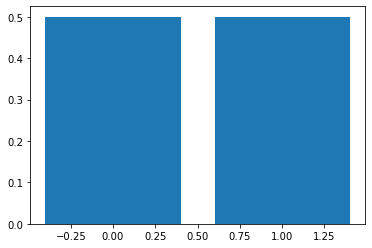

In [15]:
plt.bar(x=df['target'],height=0.5)

In [16]:
df.target.value_counts()

0    2766
1     151
Name: target, dtype: int64

In [26]:
def barplot_percentages(feature, orient='v', axis_name="Predict Based on Sex"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["pregnant"].value_counts().to_frame()
    g = g.rename({"pregnant": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='pregnant', df=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='pregnant', df=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages(df["Sex"])

ValueError: Could not interpret input 'Predict Based on Sex'

In [18]:
def fdiscretizer(attribute,dataframe):
    enc = LabelEncoder()
    dataframe[attribute] = pd.qcut(dataframe[attribute], 10, duplicates='drop')
    dataframe[attribute] = enc.fit_transform(dataframe[attribute])
    dataframe = dataframe.convert_dtypes(convert_integer=True)

fdiscretizer('Age',df)
fdiscretizer('TSH',df)
fdiscretizer('T3',df)
fdiscretizer('TT4',df)
fdiscretizer('T4U',df)
fdiscretizer('FTI',df)

display(df.head())

,target,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,1,8,0.0,0,0,0,0,0,0,0,...,7,1,0,1,0,1,9,1,0,0
1,1,0,1.0,1,0,0,0,0,0,0,...,7,1,3,1,0,1,8,1,0,0
2,1,0,0.0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,5,1,0,0
3,1,0,1.0,0,0,0,0,0,0,0,...,7,1,0,1,0,1,6,1,0,0
4,1,8,0.0,0,0,0,0,0,0,0,...,6,1,1,1,0,1,9,1,0,0


In [19]:
corr_values = abs(df[df.columns[0:]].corr()['target'][:])
corr_values = corr_values.drop('target')
corr_values = corr_values[corr_values > 0.10]
corr_values

TSH    0.372181
T3     0.202297
TT4    0.345405
T4U    0.109854
FTI    0.355763
Name: target, dtype: float64

In [20]:
def holdout(dataframe):
  x = dataframe[corr_values.index]
  y = dataframe['target']
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33) 
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = holdout(df)

In [21]:
classifiers = {
    "Nearest Neighbors" : KNeighborsClassifier(3),
    "Decision Tree" : DecisionTreeClassifier(max_depth=5),
    "Naive Bayes" : GaussianNB(),
    "Support Vector Machine" : SVC()
}

In [25]:
def classification(classifiers):
    # Creo un dataframe per visualizzare i risultati calcolati
  res = pd.DataFrame(columns=["Classifier", 
                                "Accuracy", 
                                "Precision", 
                                "Recall", 
                                "FScore"])
  for name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            pr, rc, fs, sup = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
            res = res.append({"Classifier": name,"Accuracy": round(metrics.accuracy_score(y_test, y_pred), 4),
                              "Precision": round(pr, 4), "Recall":round(rc, 4), "FScore":round(fs, 4)}, ignore_index=True)
                 
  res.set_index("Accuracy", inplace=True)
  res.sort_values(by="Accuracy", ascending=False, inplace=True)   
  return res

display(classification(classifiers))

,Classifier,Precision,Recall,FScore
Accuracy,,,,
0.9792,Decision Tree,0.8622,0.9487,0.9002
0.9782,Nearest Neighbors,0.8665,0.9179,0.8903
0.9772,Support Vector Machine,0.8676,0.8972,0.8817
0.9398,Naive Bayes,0.7227,0.9582,0.7903
